In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [71]:
N = 200 # number of points
n = 100 # number of samples/observations
p = 5 # number of variables/features

C = np.random.randint(0, 3, size=(p,p))
r = np.random.multivariate_normal(np.zeros(p), C + C.T, size=(N, n))

t = np.linspace(0, 1, N)
x = np.cumsum((1/np.sqrt(N))*r, axis=0)

mu = np.mean(x, axis=1, keepdims=True)
x = x - mu

/tmp/ipykernel_18221/2493722568.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  r = np.random.multivariate_normal(np.zeros(p), C + C.T, size=(N, n))


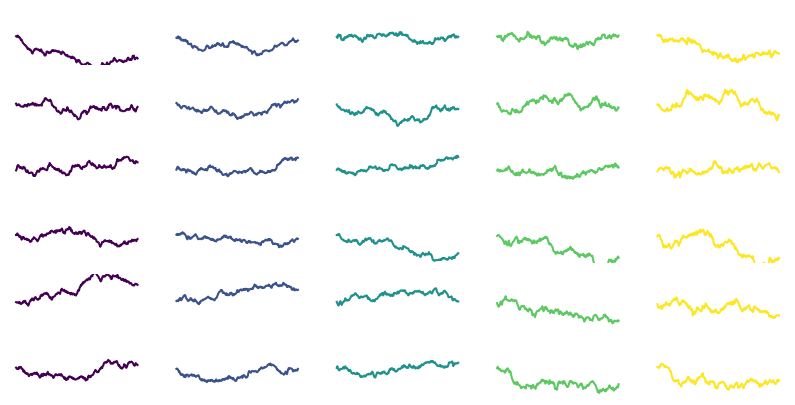

In [72]:
# plot a sample of 6 observations of the first 3 variables
fig, axs = plt.subplots(6, 5, figsize=(10, 5))
cmap = matplotlib.colormaps['viridis'].resampled(5)
for i in range(6):
    for j in range(5):
        ax = axs[i,j]
        ax.plot(t, x[:, i,j], c=cmap(j))
        ax.set_axis_off()
        ax.set_ylim((-3,3))

In [73]:
# Calculate $\hat{X}$ and its covariance statistic
x_hat = np.fft.fft(x, axis=0)
cov_hat = (x_hat.transpose(0,2,1) @ np.conjugate(x_hat)) / (n-1)

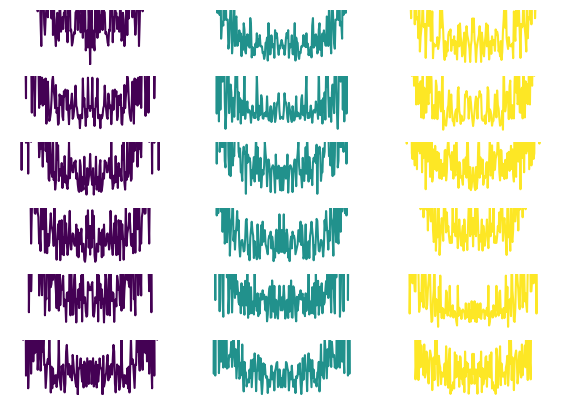

In [74]:
# plot a sample of 6 observations of the first 3 variables
fig, axs = plt.subplots(6, 3, figsize=(7, 5))
cmap = matplotlib.colormaps['viridis'].resampled(3)
for i in range(6):
    for j in range(3):
        ax = axs[i,j]
        ax.plot(t, np.absolute(x_hat[:, i,j]), c=cmap(j))
        ax.set_axis_off()
        ax.set_ylim((0,2))

In [75]:
# Calculate the eigenvalues and eigenvectors of the covariance in the Fourier domain and order by descending order
eval_hat, evec_hat = np.linalg.eigh(cov_hat)

idx = np.argsort(eval_hat, axis=1)[:, ::-1]
eval_hat = np.take_along_axis(eval_hat, idx, axis=-1)
evec_hat = np.take_along_axis(evec_hat, idx[:,np.newaxis,:], axis=-1)

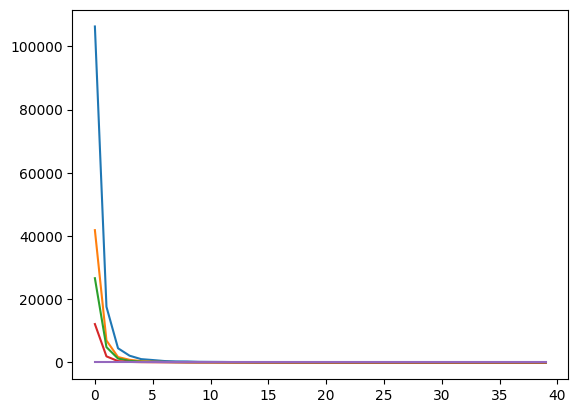

In [76]:
plt.plot(eval_hat[:40])
plt.show()

In [77]:
# select correctly the sign of the eigenvectors
#for i in range(1, eigenvectors.shape[0]):
#    eigenvectors[i] *= np.sign(np.sum(eigenvectors[i] * eigenvectors[i-1], axis=0, keepdims=True))

# Method I
It is the more costly bust straightforward. We just need to calculate:
$$
Y(t) = (\Psi^* \circ \Psi) (X(t))
$$
It can be written in the matrix form as
$$
Y(t) = V(t) \ast V(t)^\dagger \ast X(t)
$$

In [94]:
x_hat.shape

(200, 100, 5)

In [98]:
evec = np.fft.ifft(evec_hat, axis=0)
evec_conjugate = np.fft.ifft(evec_hat.conjugate(), axis=0)

In [99]:
evec_conjugate - np.conjugate(evec[::-1])

array([[[-3.60004626e-01+2.73380072e-18j,
         -4.91771179e-01-5.49263387e-18j,
          3.55219095e-02-3.46927723e-18j,
         -2.64686401e-03+8.92952593e-18j,
         -3.94159016e-01+2.85386572e-18j],
        [-2.84865628e-01-2.77156788e-17j,
          7.29937187e-03+5.02916704e-17j,
          4.25888846e-02-2.39377747e-16j,
          3.39947680e-02-3.39318175e-18j,
          3.94159016e-01+1.12502813e-17j],
        [-3.65581465e-01-1.47731485e-17j,
          1.44885497e-01+1.28059266e-17j,
          2.71552263e-02-1.63302592e-16j,
         -7.30476178e-02-1.31546301e-17j,
          2.14955815e-10-1.83649441e-17j],
        [-5.19232289e-01-3.57903229e-17j,
          3.72052680e-01+2.83937078e-18j,
         -3.70334705e-02-3.35942175e-17j,
          3.10346895e-02+5.37615929e-17j,
         -3.94159016e-01-1.26145016e-18j],
        [-5.94371288e-01-3.27417155e-17j,
         -1.27017871e-01-5.10371735e-18j,
         -4.41004456e-02+2.03176773e-16j,
         -5.60694254e-03-2.783

In [100]:
k=1

x_complex = x.astype(np.complex128)
Z1 = np.zeros((N+N-1, n, k), dtype=np.complex128)
for _n in range(n):
    for _p in range(p):
        for _k in range(k):
            Z1[:, _n, _k] += np.convolve(x_complex[:, _n, _p], evec_conjugate[:, _p, _k], mode="full")

In [101]:
y = np.zeros((N+N+N-2, n, p), dtype=np.complex128)
for _n in range(n):
    for _p in range(p):
        for _k in range(k):
            y[:, _n, _p] += np.convolve(Z1[:, _n, _k], evec[:, _p, _k], mode="full")

y = y[:N]

In [102]:
print("Mean Square Error in real domain: ", np.mean(np.square(np.absolute(y - x))))

Mean Square Error in real domain:  0.6291179672137298


/home/dani2442/Projects/Functional-Data-Analysis/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/dani2442/Projects/Functional-Data-Analysis/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


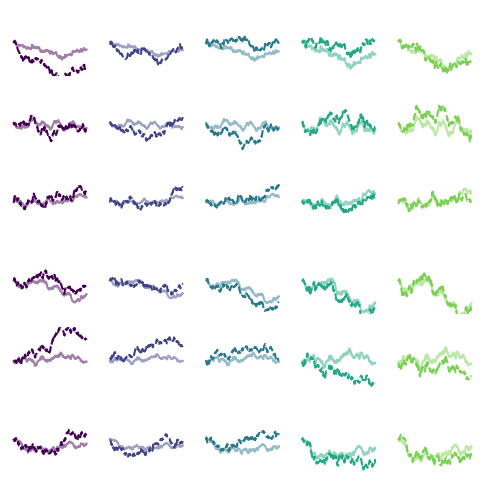

In [103]:
# plot a sample of n_r observations of the first n_c variables
n_r, n_c = 6, 5
fig, axs = plt.subplots(n_r, n_c, figsize=(6, 6))
cmap = matplotlib.colormaps['viridis'].resampled(n_c+1)
for i in range(n_r):
    for j in range(n_c):
        ax = axs[i,j]
        ax.plot(t, x[:, i,j], c=cmap(j), linestyle='dashed')
        ax.plot(t, y[:, i,j], c=cmap(j), alpha=0.5)
        ax.set_axis_off()
        ax.set_ylim((-3,3))

# Method 2
Calculate the long but efficient way:
$$
Y(t) = (\mathcal{F}^{-1} \circ \Phi^*(\cdot, \widehat{V}(\xi)) \circ \Phi(\cdot, \widehat{V}(\xi)) \circ \mathcal{F}) (X(t))
$$
In other words, the operations in matrix in the Fourier space look like
$$
\widehat{Y}(\xi) = V(t)V(t)^\dagger \widehat{X}(\xi)
$$

In [107]:
k=1

Z2 = x_hat @ evec_hat[:, :, :k].conjugate()
y_hat = Z2 @ evec_hat[:, :, :k].transpose(0,2,1)

y = np.fft.ifft(y_hat, axis=0)

In [108]:
print("Mean Square Error in Fourier domain: ", np.mean(np.square(np.absolute(x_hat - y_hat))))
print("Mean Square Error in Real domain: ", np.mean(np.square(np.absolute(x - y))))

Mean Square Error in Fourier domain:  124.19608670912329
Mean Square Error in Real domain:  0.6209804335456162


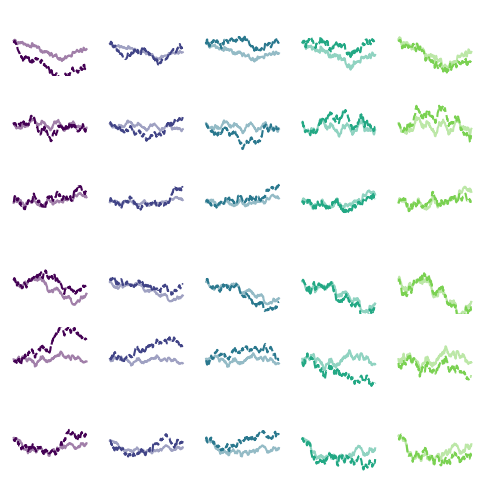

In [109]:
# plot a sample of n_r observations of the first n_c variables
n_r, n_c = 6, 5
fig, axs = plt.subplots(n_r, n_c, figsize=(6,6))
cmap = matplotlib.colormaps['viridis'].resampled(n_c+1)
for i in range(n_r):
    for j in range(n_c):
        ax = axs[i,j]
        ax.plot(t, x[:, i,j], c=cmap(j), linestyle='dashed')
        ax.plot(t, y[:, i,j].real + mu[:, 0, j], c=cmap(j), alpha=0.5)
        ax.set_axis_off()
        ax.set_ylim((-3,3))

In [90]:
np.allclose(np.fft.fft(Z1[:N]) ,Z2)

False

In [93]:
np.mean(np.square(np.fft.ifft(Z2)-Z1[:N]))

np.complex128(413.08853562412264+9.06396714034272j)